# Questão 2
### Dataset: https://www.kaggle.com/c/titanic/data
### Baixando os dados  
Utilizou-se apenas o train.csv, pois ele tem as labels - saídas, 1 ou 0 se sobreviveu ou não.

In [74]:
import pandas as pd

df = pd.read_csv("data/train.csv")
print(f"Tamanho do df: {len(df)}")
print("Colunas:")
display(df.columns)
print("Valores nulos")
df.isna().sum()


Tamanho do df: 891
Colunas:


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Valores nulos


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Observando as colunas

Colunas como Passanger Id, Name são pouco uteis para a análise, além disso, opta-se por retirar linhas que possuem valores nulos.

In [75]:
df = df.drop(columns=["Name", "PassengerId","Cabin","Ticket"])
df_median = df.copy()
df_median["Age"] = df["Age"].fillna(df["Age"].median())
df_drop = df.dropna(axis=0).copy()
print(f"Tamanho do df com mediana: {len(df_median)}")
print(f"Tamanho do df tirando todos os valores nulos: {len(df_drop)}")
df.isna().sum()

Tamanho do df com mediana: 891
Tamanho do df tirando todos os valores nulos: 712


Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

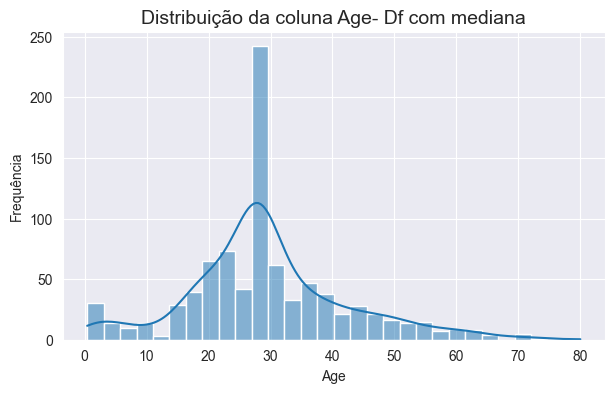

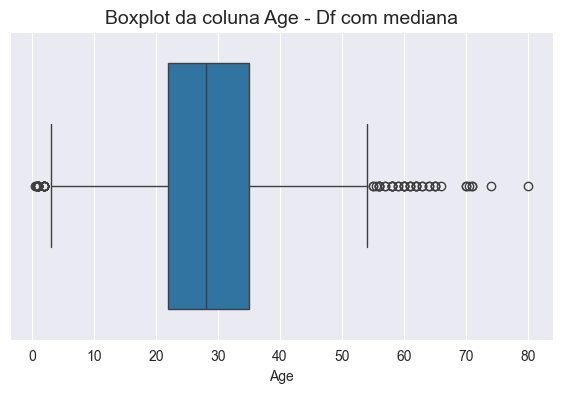

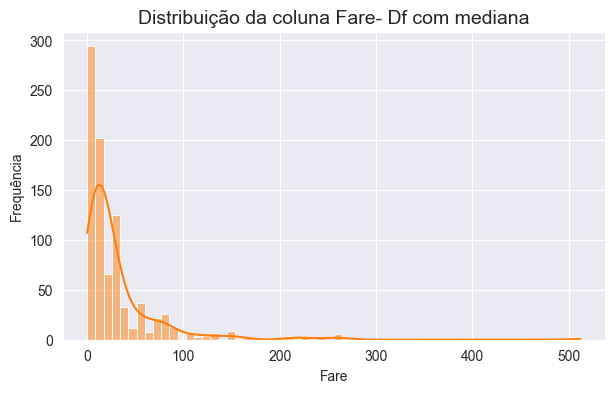

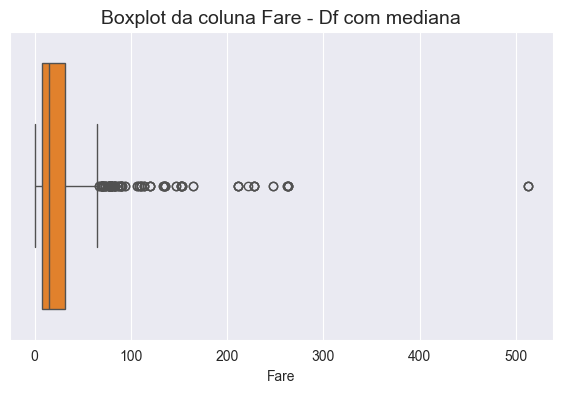

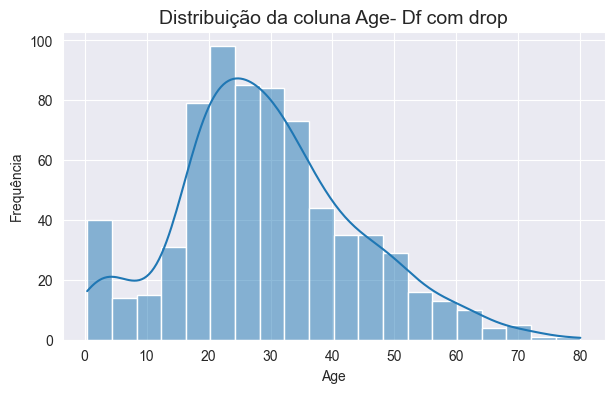

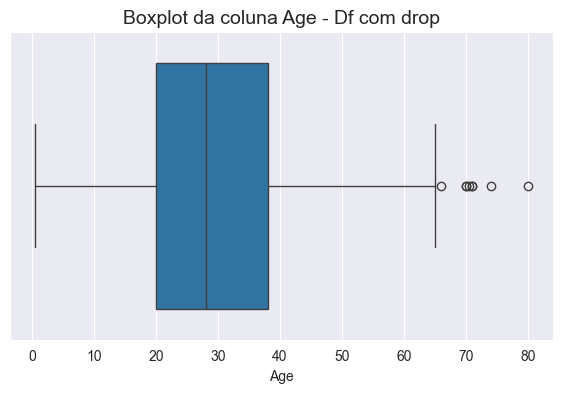

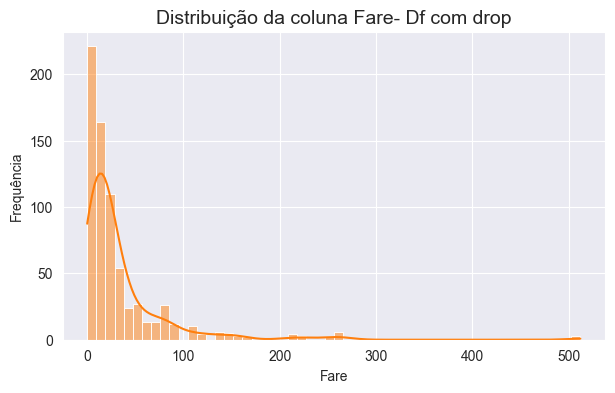

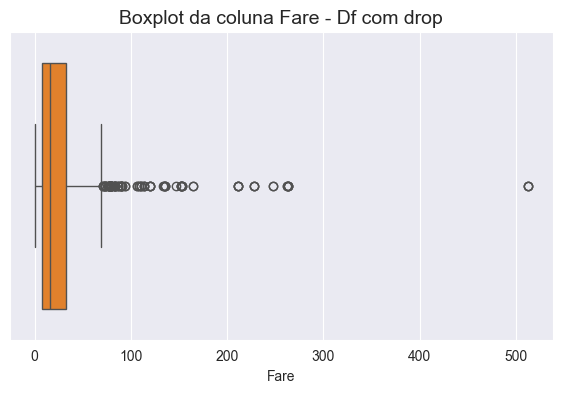

In [76]:
import matplotlib.pyplot  as plt
import seaborn as sns

# 1. Gerar plots de cada coluna numérica
def plot(df,nome):
    # Configurações globais de estilo
    plt.rcParams['font.family'] = 'Poppins'   # fonte
    plt.rcParams['figure.figsize'] = (7,4)
    sns.set_style("darkgrid")

    # Definindo cores
    colors = {"Age": "#1f77b4", "Fare": "#ff7f0e"}

    for col in ["Age", "Fare"]:
        # Histograma
        plt.figure()
        sns.histplot(df[col].dropna(), kde=True, color=colors[col])
        plt.title(f"Distribuição da coluna {col}- {nome}", fontsize=14)
        plt.xlabel(col)
        plt.ylabel("Frequência")
        plt.show()

        # Boxplot para outliers
        plt.figure()
        sns.boxplot(x=df[col], color=colors[col])
        plt.title(f"Boxplot da coluna {col} - {nome}", fontsize=14)
        plt.xlabel(col)
        plt.show()

plot(df_median,"Df com mediana")
plot(df_drop,"Df com drop")

Observando os gráficos foi decidido utilizar log, que "puxa" valores muitos distantes para perto de média e normalizar as idades.

In [64]:
import numpy as np
from sklearn.preprocessing import StandardScaler

df_median["Fare"] = np.log1p(df_median["Fare"])
df_drop["Fare"] = np.log1p(df_drop["Fare"])
df_median["Age"] = StandardScaler().fit_transform(df_median[["Age"]])
df_drop["Age"] = StandardScaler().fit_transform(df_drop[["Age"]])

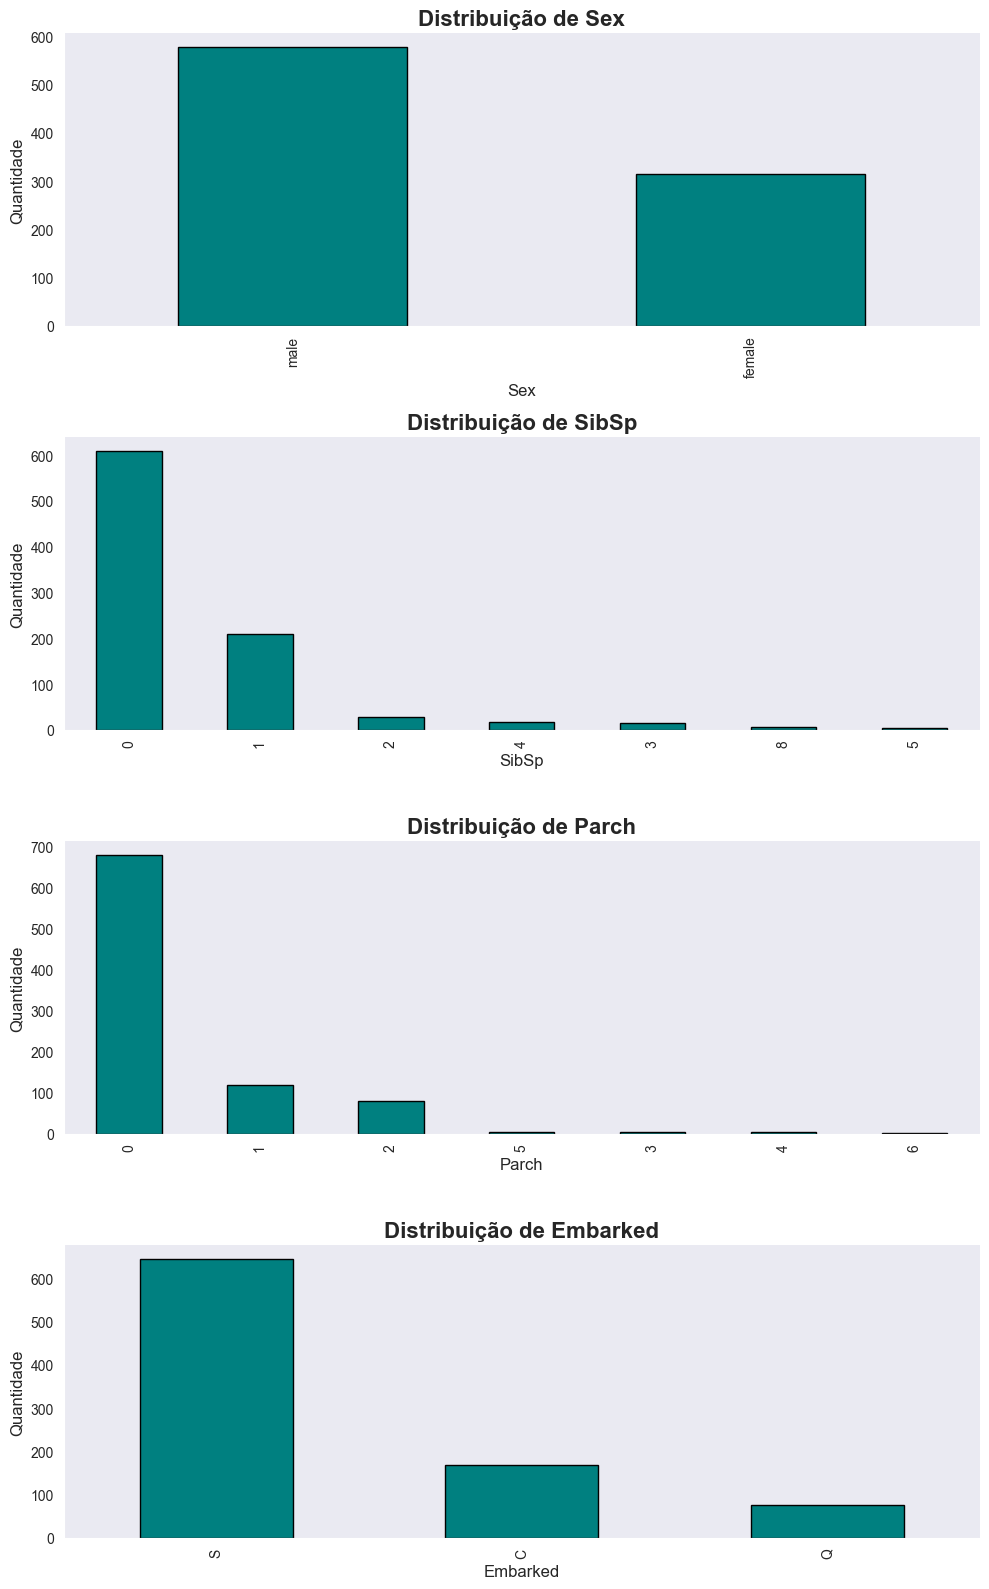

In [77]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Configura fonte global (precisa estar instalada no sistema)
rcParams['font.family'] =  'Arial'

categoricas = ['Sex', 'SibSp', 'Parch', 'Embarked']

# Cor escolhida para as barras
cor_barras = "teal"   # <-- mude aqui: ex. "purple", "#FF5733", etc.

fig, axes = plt.subplots(nrows=len(categoricas), ncols=1, figsize=(10, 4*len(categoricas)))

for i, col in enumerate(categoricas):
    df[col].value_counts().plot(
        kind="bar",
        ax=axes[i],
        color=cor_barras,
        edgecolor="black"
    )
    axes[i].set_title(f"Distribuição de {col}", fontsize=16, fontweight="bold")
    axes[i].set_ylabel("Quantidade", fontsize=12)
    axes[i].set_xlabel(col, fontsize=12)

    # Remove grid
    axes[i].grid(False)

    # Estilo nos eixos
    axes[i].spines["top"].set_visible(False)
    axes[i].spines["right"].set_visible(False)

plt.tight_layout()
plt.show()


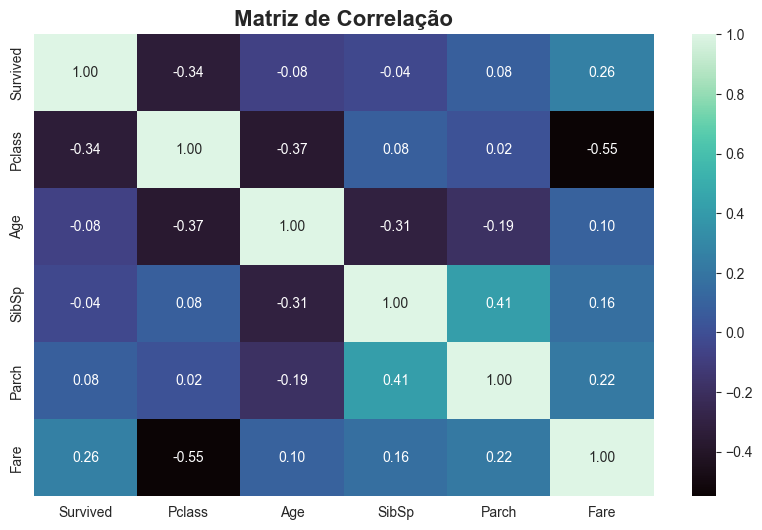

In [81]:
# Matriz de correlação
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="mako", fmt=".2f", cbar=True)

plt.title("Matriz de Correlação", fontsize=16, fontweight="bold")
plt.show()

C:\Users\thiag\AppData\Local\Temp\ipykernel_20136\1109359532.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_survived.values, y=corr_survived.index, palette="mako")


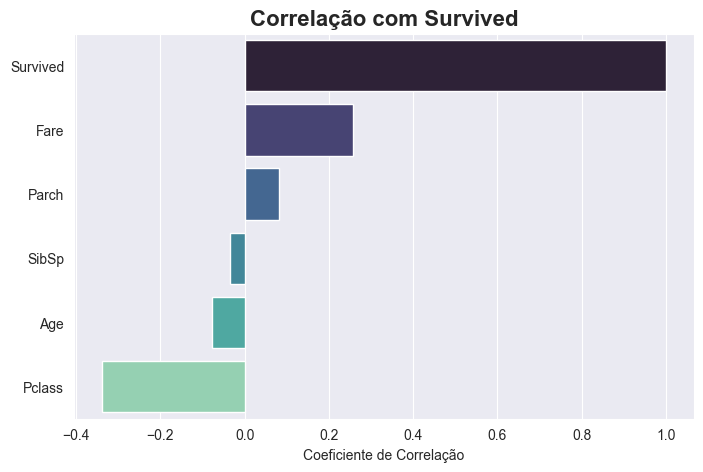

In [80]:
# Correlação apenas com Survived
corr_survived = corr["Survived"].sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=corr_survived.values, y=corr_survived.index, palette="mako")

plt.title("Correlação com Survived", fontsize=16, fontweight="bold")
plt.xlabel("Coeficiente de Correlação")
plt.ylabel("")
plt.show()


In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# -------------------------------
# Selecionar features
# -------------------------------
X1 = df_median[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y1 = df_median['Survived']
X2 = df_drop[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y2 = df_drop['Survived']

    # -------------------------------
    # Dividir treino/teste
    # -------------------------------
def treino(X,y):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # -------------------------------
    # Pré-processamento
    # -------------------------------
    # Variáveis categóricas
    categorical_features = ['Sex', 'Embarked']
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),  # preencher nulos
        ('onehot', OneHotEncoder(handle_unknown='ignore'))     # OneHotEncoding
    ])

    # Variáveis numéricas
    numeric_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),         # preencher nulos
        ('scaler', StandardScaler())                           # padronizar
    ])

    # Combinar no ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ]
    )

    # -------------------------------
    # Modelo
    # -------------------------------
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=200))
    ])

    # Treinar
    model.fit(X_train, y_train)

    # -------------------------------
    # Avaliar
    # -------------------------------
    y_pred = model.predict(X_test)
    print("Acurácia:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    
print("Df com mediana")
treino(X1,y1)
print("Df com drop")
treino(X2,y2)

Df com mediana
Acurácia: 0.8044692737430168
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179

Df com drop
Acurácia: 0.7972027972027972
              precision    recall  f1-score   support

           0       0.82      0.85      0.83        85
           1       0.76      0.72      0.74        58

    accuracy                           0.80       143
   macro avg       0.79      0.79      0.79       143
weighted avg       0.80      0.80      0.80       143

